## Importing Necessary Libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score , LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
from statsmodels.regression.quantile_regression import QuantReg

## Data Preparation:

### Read the data file.
### Check the structure of the data.
### Rename columns.
### Summary statistics and pair plots.


In [129]:
"""# Read the CSV file
file_path = "C:/Users/HP/Medical Cost Prediction/medical_insurance.csv"
x = pd.read_csv(file_path)
x"""

'# Read the CSV file\nfile_path = "C:/Users/HP/Medical Cost Prediction/medical_insurance.csv"\nx = pd.read_csv(file_path)\nx'

In [130]:
"""# Checking the structure of the data
print(x.info())
print(x.describe())"""

'# Checking the structure of the data\nprint(x.info())\nprint(x.describe())'

In [131]:
"""# pair plot
sns.pairplot(x)
plt.show()"""

'# pair plot\nsns.pairplot(x)\nplt.show()'

In [132]:
"""# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(x[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()"""

"# Correlation matrix\nplt.figure(figsize=(10, 8))\nsns.heatmap(x[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)\nplt.title('Correlation Matrix')\nplt.show()"

In [133]:
# Load the data
file_path = "C:/Users/HP/Medical Cost Prediction/population_drinking1.txt"
data = pd.read_csv(file_path, sep="\t")
data.columns = ["Ind", "Ind_1", "Urban population", "Late births", "Wine consumption per capita", "Liquor consumption per capita", "Cirrhosis death rate"]
data.head(5)


,Ind,Ind_1,Urban population,Late births,Wine consumption per capita,Liquor consumption per capita,Cirrhosis death rate
0,1,1,44,33.2,5,30,41.2
1,2,1,43,33.8,4,41,31.7
2,3,1,48,40.6,3,38,39.4
3,4,1,52,39.2,7,48,57.5
4,5,1,71,45.5,11,53,74.8


In [ ]:
# Checking the structure of the data
print(data.info())
print(data.describe())

# Pair plot
sns.pairplot(data.iloc[:, 2:])
plt.show()

# Correlation matrix
corr = data.iloc[:, 2:].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [80]:
data.head(5)

,Ind,Ind_1,Urban population,Late births,Wine consumption per capita,Liquor consumption per capita,Cirrhosis death rate
0,1,1,44,33.2,5,30,41.2
1,2,1,43,33.8,4,41,31.7
2,3,1,48,40.6,3,38,39.4
3,4,1,52,39.2,7,48,57.5
4,5,1,71,45.5,11,53,74.8


## Linear Regression:

### Fit a linear regression model.
### Plot observed vs. predicted values.
### Residual analysis.


In [47]:
x = data.drop(columns=['Ind', 'Ind_1' , 'Cirrhosis death rate'])
y = data['Cirrhosis death rate']
X_const = sm.add_constant(x)
model = sm.OLS(y, X_const).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Cirrhosis death rate   R-squared:                       0.814
Model:                              OLS   Adj. R-squared:                  0.795
Method:                   Least Squares   F-statistic:                     44.75
Date:                  Sat, 20 Jul 2024   Prob (F-statistic):           1.95e-14
Time:                          18:34:36   Log-Likelihood:                -171.25
No. Observations:                    46   AIC:                             352.5
Df Residuals:                        41   BIC:                             361.6
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

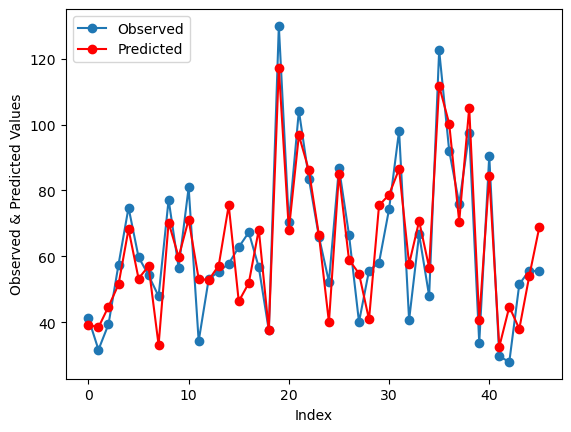

In [48]:
# Plot observed vs. predicted values
plt.plot(range(len(y)), y, 'o-', label='Observed')
plt.plot(range(len(y)), model.fittedvalues, 'o-', label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Observed & Predicted Values')
plt.legend()
plt.show()

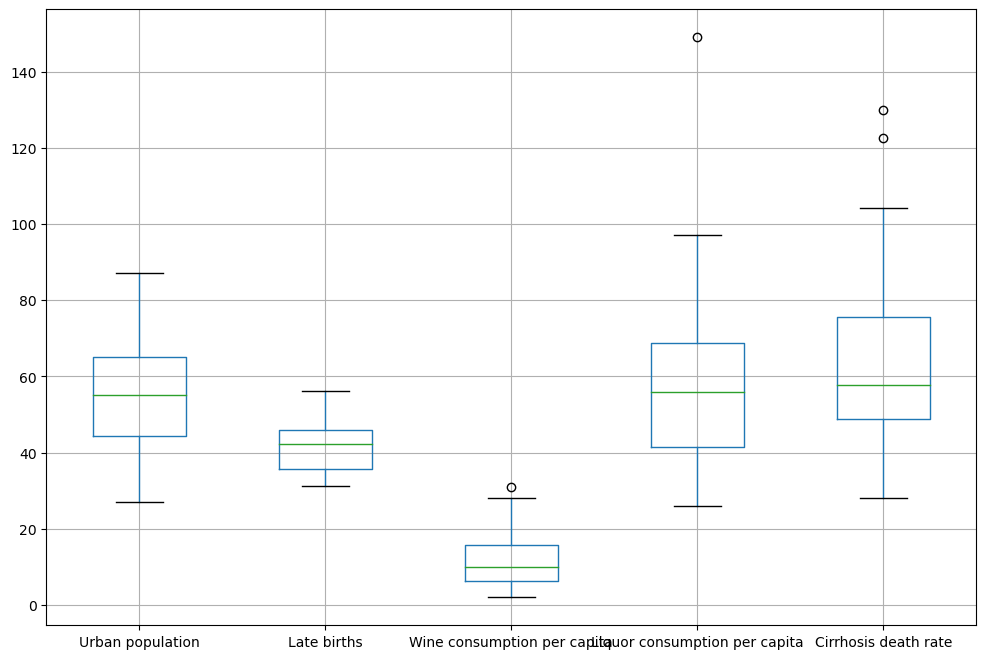

In [75]:
# Boxplot
plt.figure(figsize=(12, 8)) 
data.iloc[:, 2:].boxplot()
plt.show()

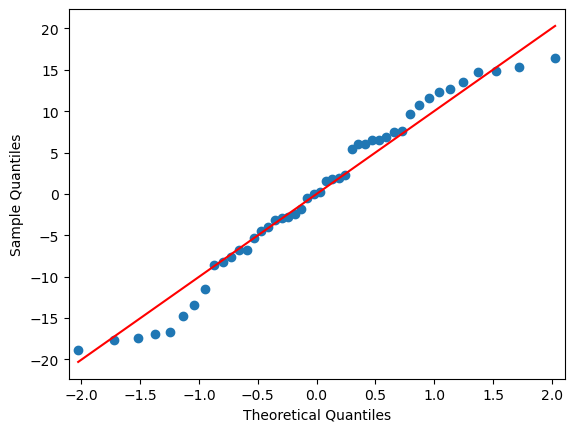

In [49]:
# Residual analysis
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.show()

In [50]:
# Shapiro-Wilk test
#from scipy.stats import shapiro
#print(shapiro(residuals))
print("Shapiro-Wilk test:", stats.shapiro(residuals))

Shapiro-Wilk test: ShapiroResult(statistic=0.9598726034164429, pvalue=0.11334168165922165)


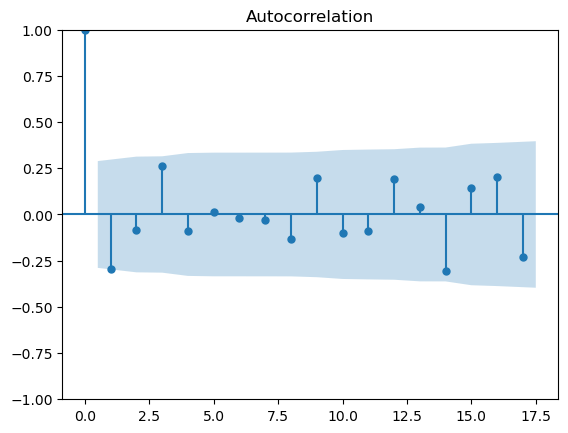

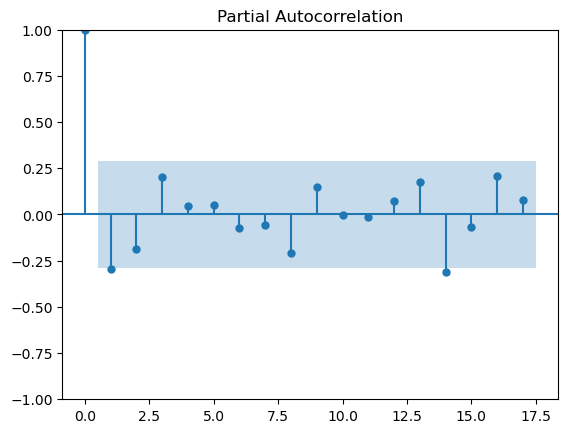

In [156]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals)
plt.show()
plot_pacf(residuals)
plt.show()


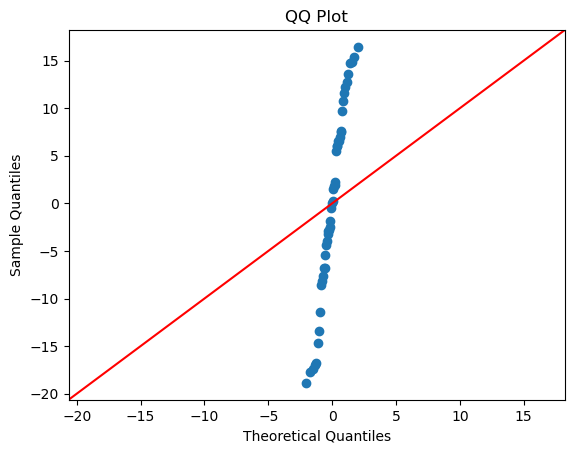

In [157]:
# Q-Q plot
fig, ax = plt.subplots()
sm.qqplot(residuals, line ='45', ax=ax)
plt.title("QQ Plot")
plt.show()

## Diagnostic Tests:

### Homoscedasticity tests.
### Autocorrelation tests.
### Influence measures.


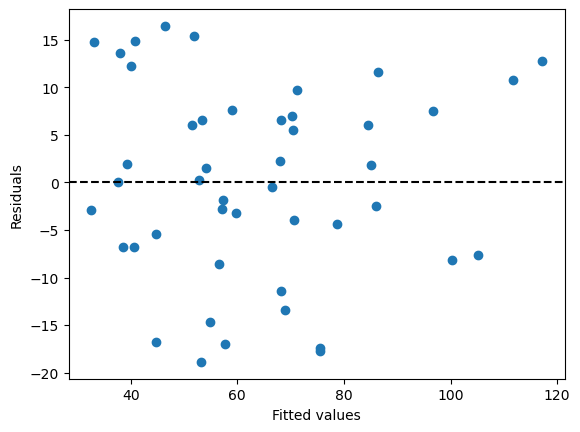

In [51]:
# Homoscedasticity test
# Plot Residuals vs Fitted
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [52]:
# Homoscedasticity test
_, pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan test p-value:", pval)

Breusch-Pagan test p-value: 0.6104547560461752


In [53]:
# Autocorrelation Test
#ACF plot
#PACF plot
print("Durbin-Watson test:", sm.stats.durbin_watson(residuals))

Durbin-Watson test: 2.5493858589486162


In [54]:
# Autocorrelation Test
print("Breusch-Godfrey test:", acorr_breusch_godfrey(model, nlags=20))

Breusch-Godfrey test: (24.95124023223166, 0.20330290035828194, 1.2446720154961857, 0.31103804363640813)


In [82]:
# Influence measures
influence = model.get_influence()
# leverage points
leverage = influence.hat_matrix_diag
n = len(data)
p = 5
high_leverage_points = leverage[leverage > 2 * (p / n)]
high_leverage_indices = np.where(leverage > 2 * (p / n) )[0]
print(high_leverage_points)
print(high_leverage_indices)

[0.30154173 0.30422407 0.49946919 0.29983295]
[11 19 35 37]


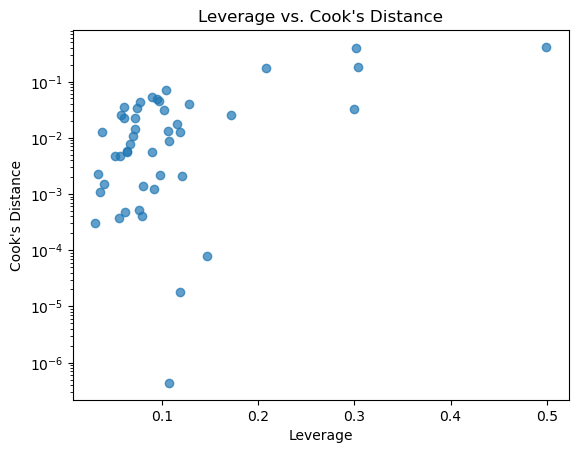

In [125]:
# Influence Plot (Leverage vs. Cooks Distance)
plt.scatter(leverage, cooks_d, alpha=0.7)
plt.xlabel('Leverage')
plt.ylabel("Cook's Distance")
plt.title("Leverage vs. Cook's Distance")
plt.yscale('log')  # Log scale for better visualization
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1884\3524985287.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(dffits)), dffits, use_line_collection=True)


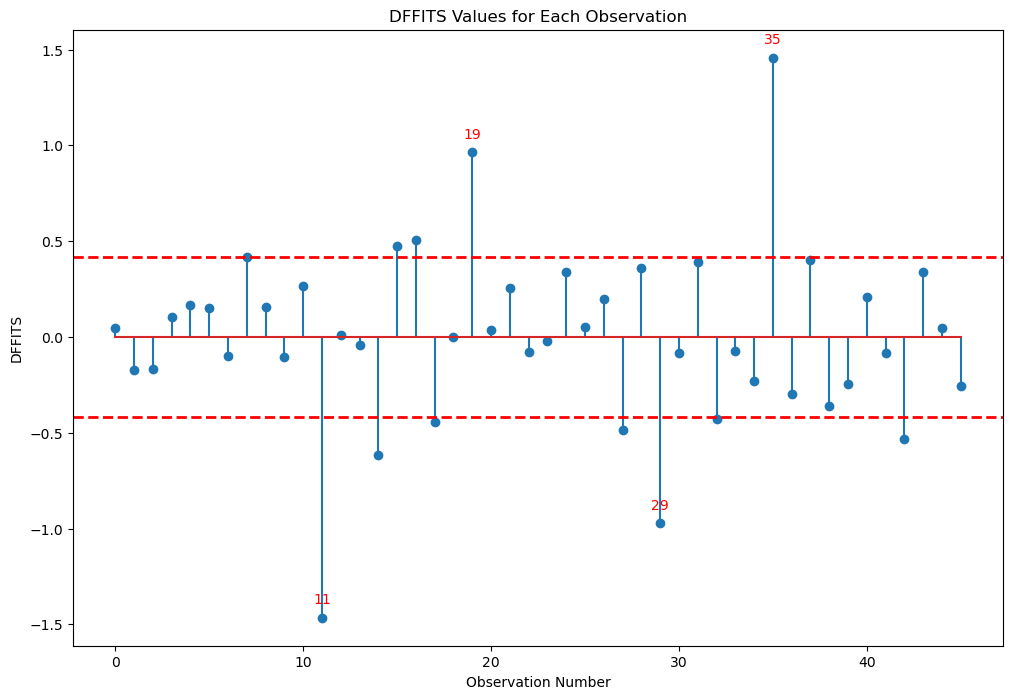

In [116]:
# DFFITS
dffits = influence.dffits[0]
plt.figure(figsize=(12, 8))
plt.stem(np.arange(len(dffits)), dffits, use_line_collection=True)
plt.axhline(y=2 * np.sqrt(2 / len(dffits)), color='r', linestyle='--', linewidth=2)
plt.axhline(y=-2 * np.sqrt(2 / len(dffits)), color='r', linestyle='--', linewidth=2)
plt.xlabel('Observation Number')
plt.ylabel('DFFITS')
plt.title('DFFITS Values for Each Observation')

# Highlight and annotate influential points
#threshold = 2 * np.sqrt(2 / len(dffits))
threshold = 0.66
outliers = np.where(np.abs(dffits) > threshold)[0]

for i in outliers:
    plt.annotate(i, (i, dffits[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.show()

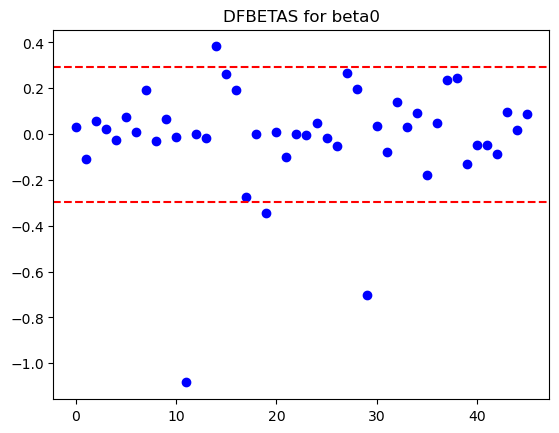

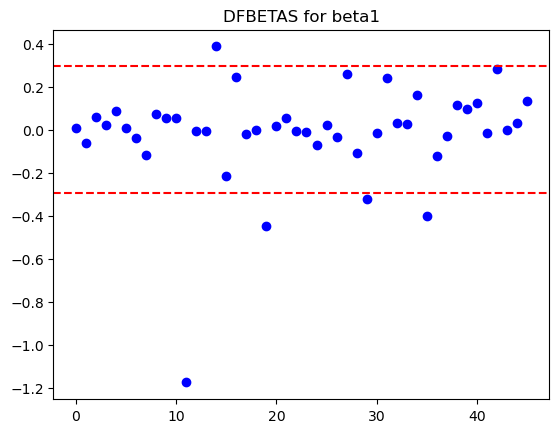

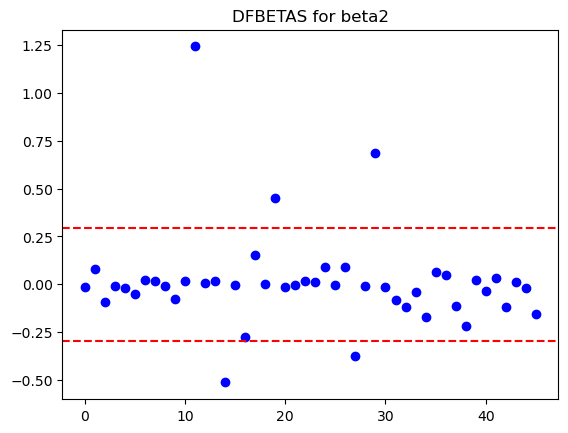

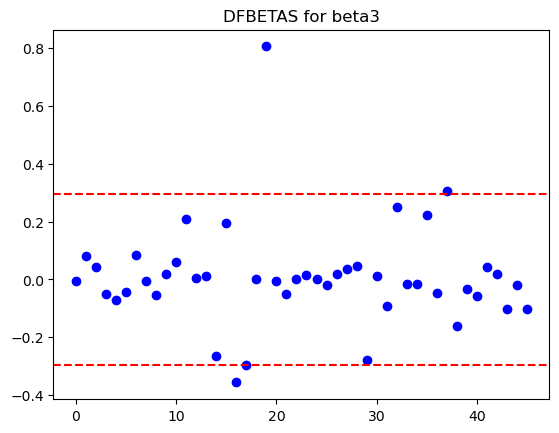

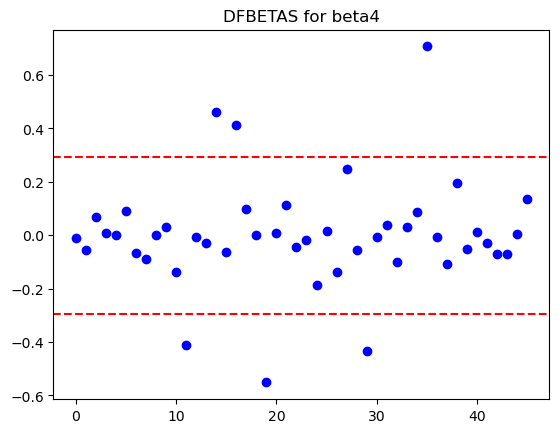

In [121]:
# DFBETAS
dfbetas = influence.dfbetas
for i in range(dfbetas.shape[1]):
    plt.plot(dfbetas[:, i], 'bo')
    plt.axhline(y=2 / np.sqrt(n), color='red', linestyle='--')
    plt.axhline(y=-2 / np.sqrt(n), color='red', linestyle='--')
    plt.title(f'DFBETAS for beta{i}')
    plt.show()

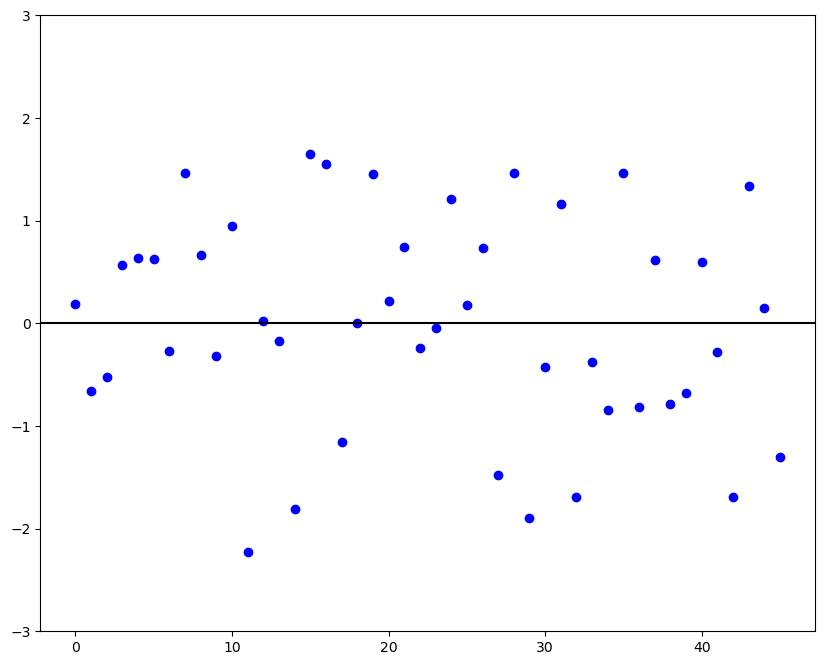

In [105]:
# Studentized Residuals
plt.figure(figsize = (10,8))
studentized_residuals = influence.resid_studentized_external
fitted_values = model.fittedvalues
plt.plot(studentized_residuals, 'bo')
plt.axhline(y=0, color='black')
plt.ylim(-3, 3)
plt.show()

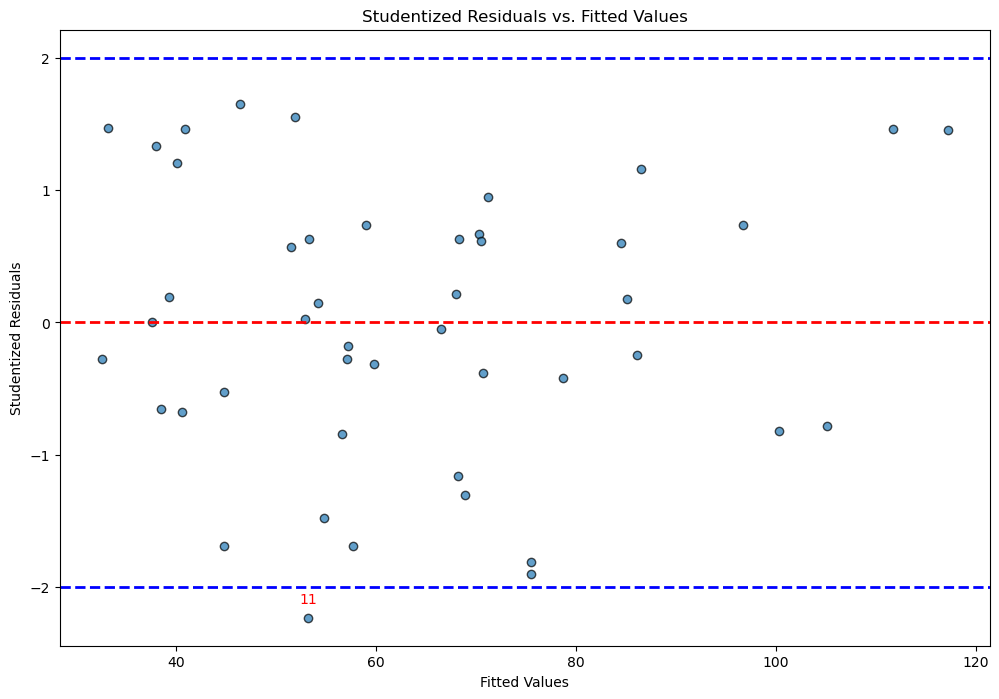

In [111]:
# Deleted studentized Residual vs Predicted values
plt.figure(figsize=(12, 8))
plt.scatter(fitted_values, studentized_residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.axhline(y=2, color='b', linestyle='--', linewidth=2)
plt.axhline(y=-2, color='b', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')

# Highlight outliers
threshold = 2
outliers = np.where(np.abs(studentized_residuals) > threshold)[0]
for i in outliers:
    plt.annotate(i, (fitted_values[i], studentized_residuals[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.show()

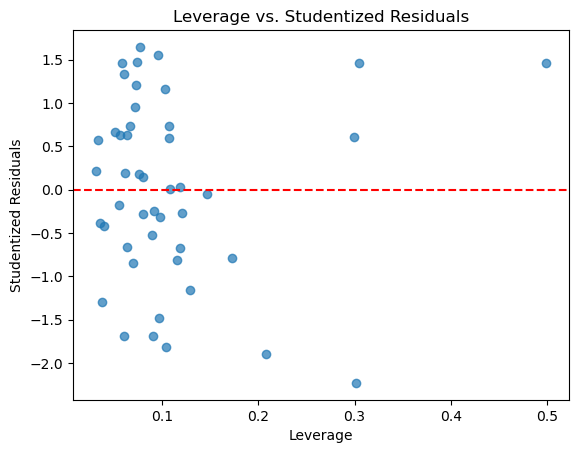

In [122]:
# Leverage vs. Studentized Residuals plot
plt.scatter(leverage, studentized_residuals, alpha=0.7)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Leverage vs. Studentized Residuals')
plt.axhline(y=0, color='r', linestyle='--')

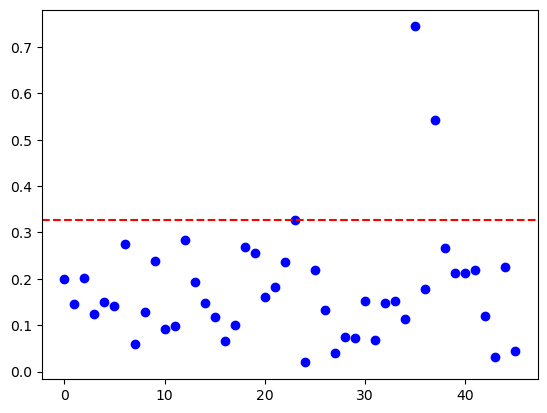

In [117]:
# Covariance Ratios
covratio = influence.cov_ratio
plt.plot(np.abs(covratio - 1), 'bo')
plt.axhline(y=3 * p / n, color='red', linestyle='--')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1884\540310985.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=" ", use_line_collection=True)


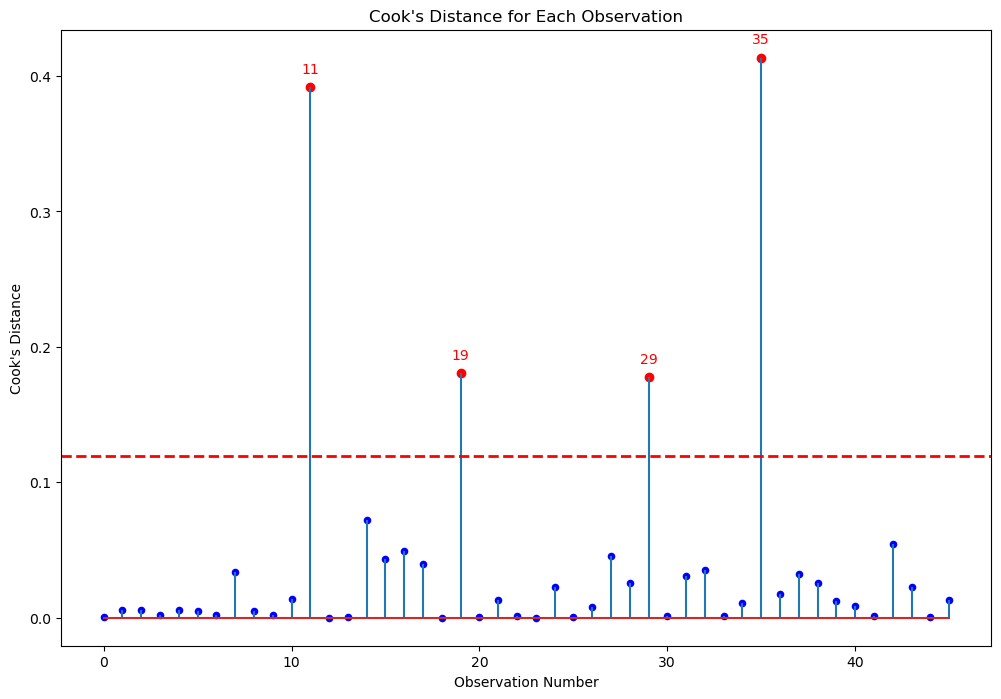

In [128]:
# cook's distance
cooks_d = influence.cooks_distance[0]
plt.figure(figsize=(12, 8))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=" ", use_line_collection=True)
plt.scatter(np.arange(len(cooks_d)), cooks_d, color='blue', s=20)
threshold = 3 * np.mean(cooks_d)
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2)
plt.xlabel('Observation Number')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")

# Highlight and annotate influential points
influential_points = np.where(cooks_d > threshold)[0]

for i in influential_points:
    plt.annotate(i, (i, cooks_d[i]), textcoords="offset points", xytext=(0, 10), ha='center', color='red')
    plt.scatter(i, cooks_d[i], color='red')  # Highlight the point in red

plt.show()

In [147]:
# Model without influential points
influential_points = [11, 19, 29, 35]
X_out = data.drop(index=influential_points)
Y_out = X_out['Cirrhosis death rate']
A_out = X_out[["Urban population", "Late births", "Wine consumption per capita", "Liquor consumption per capita"]]
A_out1 = sm.add_constant(A_out)
reg_out = sm.OLS(Y_out, A_out1).fit()
print(reg_out.summary())

                             OLS Regression Results                             
Dep. Variable:     Cirrhosis death rate   R-squared:                       0.824
Model:                              OLS   Adj. R-squared:                  0.805
Method:                   Least Squares   F-statistic:                     43.18
Date:                  Tue, 23 Jul 2024   Prob (F-statistic):           1.87e-13
Time:                          00:40:53   Log-Likelihood:                -147.66
No. Observations:                    42   AIC:                             305.3
Df Residuals:                        37   BIC:                             314.0
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [136]:
# Normality test
print(normal_ad(model.resid))

(0.41034760969227335, 0.32982731491303413)


In [143]:
# Normality test removing outliers
print(normal_ad(reg_out.resid))

(0.17415116662978392, 0.9205724103890799)


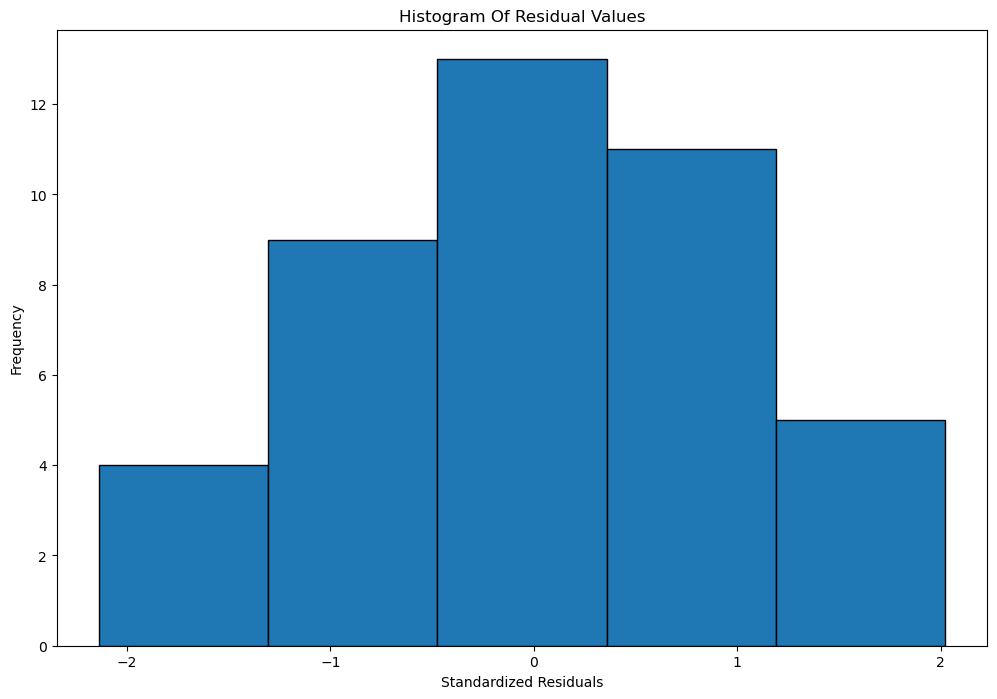

In [142]:
# Normality of residuals
# Calculate standardized residuals
standardized_residuals = reg_out.get_influence().resid_studentized_internal

# Create the histogram
plt.figure(figsize=(12, 8))
plt.hist(standardized_residuals, bins=5, edgecolor='k')
plt.title("Histogram Of Residual Values")
plt.xlabel("Standardized Residuals")
plt.ylabel("Frequency")
plt.show()

In [153]:
# VIF
influential_points = [11, 19, 29, 35]
X_out = data.drop(index=influential_points)
Y_out = X_out['Cirrhosis death rate']
A_out = X_out[["Urban population", "Late births", "Wine consumption per capita", "Liquor consumption per capita"]]

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Define the independent variables (without the constant term for VIF calculation)
X_independent = data[["Urban population", "Late births", "Wine consumption per capita", "Liquor consumption per capita"]]

# Calculate VIF for the dataset excluding specific observations
vif_subset = calculate_vif(A_out)
print("VIF for the dataset excluding specific observations:")
print(vif_subset)

# Calculate VIF for the complete dataset
vif_complete = calculate_vif(X_independent)
print("VIF for the complete dataset:")
print(vif_complete)

VIF for the dataset excluding specific observations:
                         feature        VIF
0               Urban population  79.460609
1                    Late births  90.869725
2    Wine consumption per capita  12.311451
3  Liquor consumption per capita  27.498540
VIF for the complete dataset:
                         feature        VIF
0               Urban population  70.101943
1                    Late births  90.813472
2    Wine consumption per capita  11.907977
3  Liquor consumption per capita  24.475775


In [159]:
# Filter out influential points
influential_points = [11, 19, 29, 35]
X = data.drop(['Cirrhosis death rate'], axis=1).drop(index=influential_points)
Y = data['Cirrhosis death rate'].drop(index=influential_points)

In [162]:
# Add a constant term for the intercept
X = add_constant(X)

In [175]:
def fit_ols(X, Y):
    model = sm.OLS(Y, X).fit()
    return model

def fit_lad(X, Y):
    model = QuantReg(Y, X).fit(q=0.5)
    return model

def fit_lms(X, Y):
    model = sm.RLM(Y, X, M=sm.robust.norms.HuberT()).fit()
    return model

def fit_lts(X, Y):
    model = sm.RLM(Y, X, M=sm.robust.norms.TrimmedMean()).fit()
    return model

def fit_ridge(X, Y, alpha=1.0):
    model = Ridge(alpha=alpha).fit(X, Y)
    return model

def fit_lasso(X, Y, alpha=1.0):
    model = Lasso(alpha=alpha).fit(X, Y)
    return model


In [176]:
# Fit the models
ols_model = fit_ols(X, Y)
lad_model = fit_lad(X, Y)
lms_model = fit_lms(X, Y)
lts_model = fit_lts(X, Y)
ridge_model = fit_ridge(X, Y)
lasso_model = fit_lasso(X, Y)

In [188]:
# Model Selection Metrics
def calculate_aic_bic(model, X, Y, model_type):
    if model_type in ['OLS', 'LAD']:
        aic = model.aic
        bic = model.bic
    else:
        # Calculate AIC and BIC manually for RLM, Ridge, and Lasso
        n = len(Y)
        if model_type in ['Ridge', 'Lasso']:
            residuals = Y - model.predict(X)
        else:
            residuals = Y - model.fittedvalues
        sse = np.sum(residuals**2)
        k = X.shape[1]
        aic = n * np.log(sse/n) + 2*k
        bic = n * np.log(sse/n) + k * np.log(n)
    return aic, bic

def calculate_rsquared(model, X, Y, model_type):
    if model_type in ['OLS', 'LAD']:
        return model.rsquared
    else:
        if model_type in ['Ridge', 'Lasso']:
            residuals = Y - model.predict(X)
        else:
            residuals = Y - model.fittedvalues
        ss_total = np.sum((Y - np.mean(Y))**2)
        ss_residual = np.sum(residuals**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [189]:
# Calculating R2, AIC, BIC for each model
models = {'OLS': ols_model, 'LAD': lad_model, 'LMS': lms_model, 'LTS': lts_model, 'Ridge': ridge_model, 'Lasso': lasso_model}
metrics = {}

for name, model in models.items():
    r2 = calculate_rsquared(model, X, Y, name)
    aic, bic = calculate_aic_bic(model, X, Y, name)
    metrics[name] = {'R2': r2, 'AIC': aic, 'BIC': bic}


In [190]:
# Display the metrics
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

# Select the best model
best_model = metrics_df.idxmin()
print("Best model based on R2, AIC, BIC:")
print(best_model)

             R2         AIC         BIC
OLS    0.831657  305.346859  315.772876
LAD         NaN         NaN         NaN
LMS    0.828955  186.824812  197.250830
LTS    0.817812  189.475328  199.901345
Ridge  0.831656  186.156104  196.582121
Lasso  0.830600  186.418909  196.844927
Best model based on R2, AIC, BIC:
R2       LTS
AIC    Ridge
BIC    Ridge
dtype: object
